In [1]:
from game import UltimateTicTacToe
from player import Player
from MCTS_player import MCTSPlayer
from AlphaBeta_player import AlphaBetaMiniMaxPlayer

from tqdm import tqdm
from collections import Counter
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import itertools
import time

from utils import test_mcts

In [ ]:
g2_p1_res = test_mcts(1, exp_weights=[0.5, 1.0, 1.414, 1.8, 2.5], times=[0.5, 1.0, 2.0], 
                      rollouts=[100, 500, 1000, 2000], grid_size=2, n_games=50, n_cores=7)

In [ ]:
g2_p2_res = test_mcts(2, exp_weights=[0.5, 1.0, 1.414, 1.8, 2.5], times=[0.5, 1.0, 2.0], 
                      rollouts=[100, 500, 1000, 2000], grid_size=2, n_games=50, n_cores=7)

In [ ]:
# save results for 2x2 grid

df1 = pd.DataFrame(g2_p1_res)
df1['player_id'] = '1'

df2 = pd.DataFrame(g2_p2_res)
df2['player_id'] = '2'

df = pd.concat((df1, df2))
# df.to_csv("grid2_param_stats.csv", index=False)

In [76]:
df = pd.read_csv("grid2_param_stats.csv")

In [90]:
# plot 2x2 results
def plot_results(df):
    df["id_time"] = df["player_id"].astype(str) + ":" + df["calc_time"].astype(str) 
    grouped = df.drop("player_id", axis=1).groupby(["exp_weight", "id_time", "n_rollouts"]).mean().reset_index()
    times = df["calc_time"].unique()
    to_plot = grouped.pivot(columns="id_time", values="pct_wins", index=["exp_weight", "n_rollouts"])

    weights = to_plot.index.get_level_values(0).unique()
    fig, axes = plt.subplots(2, 3, figsize=(10, 6), sharex=False, sharey=True)
    axes = axes.flatten()

    # colormapping
    cmap1 = matplotlib.colormaps['Blues']
    cmap2 = matplotlib.colormaps['Reds']
    norm = plt.Normalize(min(times) - 1, max(times))

    # for the legend
    lines = []
    labels = []

    for i, weight in enumerate(weights):
        ax = axes[i]
        data = to_plot.loc[weight]

        for column in data.columns:
            p_id = column.split(":")[0]
            time = column.split(":")[1]

            if int(p_id) == 1:
                line, = ax.plot(data.index, data[column], label=column, marker='.', color=cmap1(norm(float(time))))
            else:
                line, = ax.plot(data.index, data[column], label=column, marker='.', color=cmap2(norm(float(time))))
            
            if i == 0:
                lines.append(line)
                labels.append(column)
        
        ax.set_title(f'Exploration Weight: {weight}', fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.7)

    # unused subplot
    axes[5].set_visible(False)

    # common labels
    fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), 
            ncol=len(data.columns), fontsize=10, title='Calculation Time')
    fig.text(0.5, 0.04, 'Number of Rollouts', ha='center', fontsize=12)
    fig.text(0.04, 0.5, 'Percent Wins', va='center', rotation='vertical', fontsize=12)

    plt.tight_layout()
    plt.subplots_adjust(top=0.8, bottom=0.12, left=0.1)
    plt.suptitle("Average Win Percentage for MCTS Agent on a 2x2 Grid")
    plt.show()

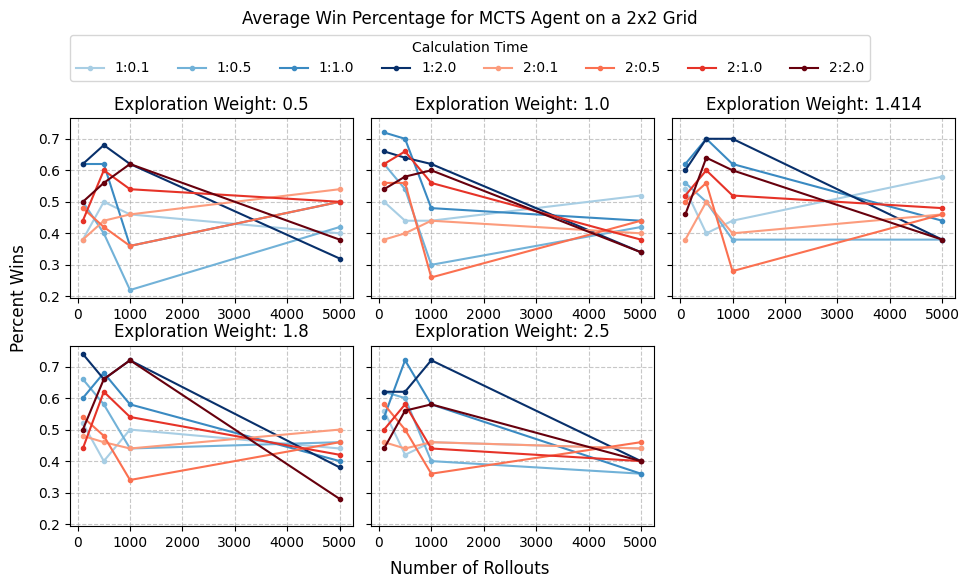

In [91]:
plot_results(df)

In [ ]:
# test on 3x3 grid 

g3_p1_res = test_mcts(1, exp_weights=[0.5, 1.0, 1.414, 1.8, 2.5], times=[0.5, 1.0, 2.0], 
                      rollouts=[100, 500, 1000, 2000], grid_size=3, n_games=50, n_cores=5)

In [8]:
g3_p2_res = test_mcts(2, exp_weights=[0.5, 1.0, 1.414, 1.8, 2.5], times=[0.5, 1.0, 2.0], 
                      rollouts=[100, 500, 1000, 2000], grid_size=3, n_games=50, n_cores=7)

In [ ]:
df3 = pd.DataFrame(g3_p1_res)
df3["player_id"] = "1"

df4 = pd.DataFrame(g3_p2_res)
df4["player_id"] = "2"

g3_df = pd.concat((df3,df4))

# g3_df.to_csv("grid3_param_stats.csv", index=False)

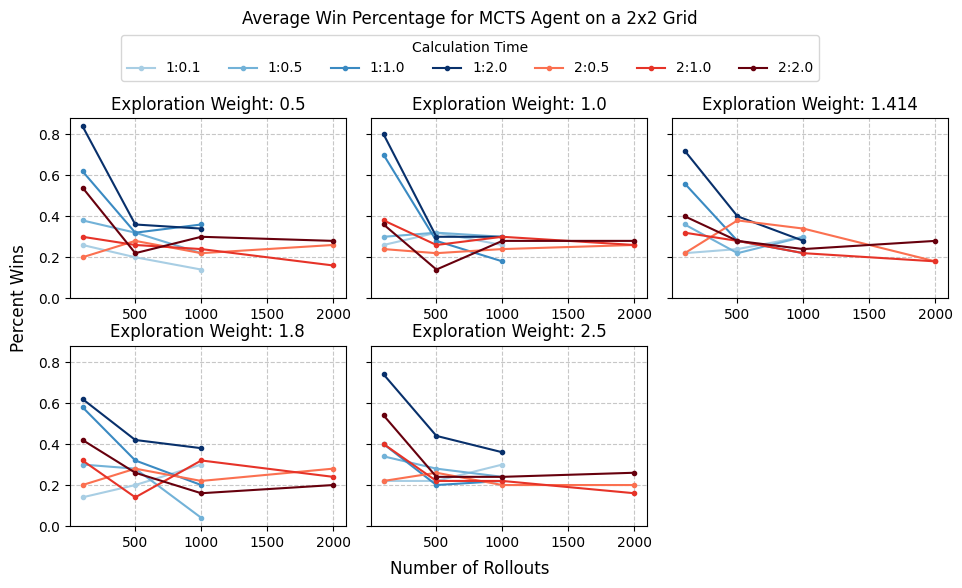

In [94]:
plot_results(g3_df)

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/var/folders/rt/y418zwhn7mv6tf_kxcm3nbtm0000gn/T/ipykernel_79181/3197770978.py:18: SyntaxWarning: invalid escape sequence '\s'
  plt.title("$\sqrt{2}$ learning weight, 0.2s calculation time, 10 rollouts per simulation")


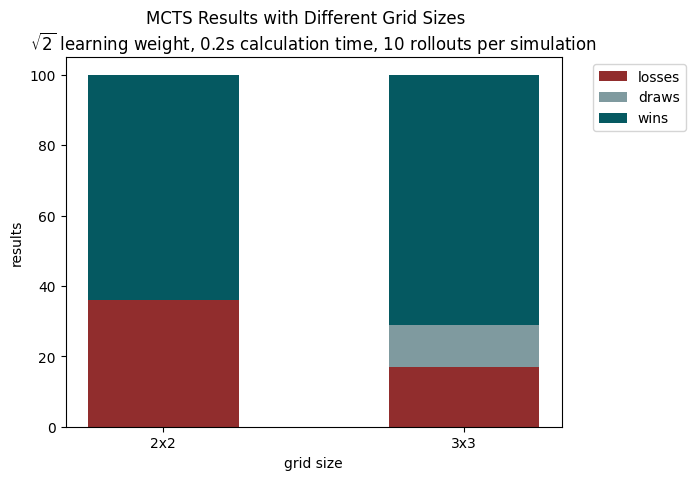

In [56]:
x = ["2x2", "3x3"]
width = 0.5

fig, ax = plt.subplots(facecolor="none")
bottom = np.zeros(2)

results = {'losses':[36,17],'draws':[0,12],'wins':[64,71]}

colors = ["#912d2d", "#7f9a9f", "#055961"]
i = 0
for label, res in results.items():
    p = ax.bar(x, res, width, label=label, bottom=bottom, color=colors[i])
    bottom += res
    i += 1

plt.xlabel("grid size")
plt.ylabel("results")
plt.title("$\sqrt{2}$ learning weight, 0.2s calculation time, 10 rollouts per simulation")
plt.suptitle("MCTS Results with Different Grid Sizes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [5]:
p1 = Player(1)
p2 = AlphaBetaMiniMaxPlayer(2, depth=3)
game = UltimateTicTacToe(p1, p2)
game.play_game()

results = []
for _ in tqdm(range(100)):
    results.append(game.play_game())

print(Counter(results))

100%|██████████| 100/100 [00:34<00:00,  2.88it/s]

Counter({2: 95, -1: 4, 1: 1})
